In [1]:
from scipy.stats import geom, laplace
import matplotlib.pyplot as plt
import numpy as np

# Основные понятия

## Геометрическое распределение

### Построим 5 реализаций выборок для различных n

In [2]:
p = 0.5
sample5, sample10, sample100, sample1000, sample100000 = [], [], [], [], []
for i in range(5):
    sample5.append(geom.rvs( p,  size= 5))
    sample10.append(geom.rvs( p,  size= 10))
    sample100.append(geom.rvs( p,  size= 100))
    sample1000.append(geom.rvs( p,  size= 1000))
    sample100000.append(geom.rvs( p,  size= 100000))

In [3]:
print('Выборки для n = 5:')
for x in sample5: print(x)
print('Выборки для n = 10:')
for x in sample10: print(x)

Выборки для n = 5:
[2 1 1 1 1]
[1 4 3 2 2]
[2 2 1 1 1]
[1 2 6 2 1]
[1 2 2 2 1]
Выборки для n = 10:
[2 1 3 1 1 1 1 4 1 2]
[1 1 3 1 1 1 3 1 1 1]
[1 1 1 1 2 1 1 1 1 3]
[1 1 1 3 1 2 1 2 1 1]
[2 1 1 1 2 2 1 2 3 2]


### Построим эмпирическую функцию распределения

In [38]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf5 = ECDF(sample5[0])
ecdf5 = ecdf5(sample5[0])
ecdf10 = ECDF(sample10[0])
ecdf10 = ecdf10(sample10[0])
ecdf100 = ECDF(sample100[0])
ecdf1000 = ECDF(sample1000[0])
ecdf100000 = ECDF(sample100000[0])

### Построим графики

In [5]:
ecdf5 = ECDF(sample5[0])
ecdf10 = ECDF(sample10[0])
x5 = np.linspace(min(sample5[0]), max(sample5[0]), num=len(sample5[0]))
x10 = np.linspace(min(sample10[0]), max(sample10[0]), num=len(sample10[0]))
yemp5 = ecdf5(x5)
yemp10 = ecdf10(x10)
yteor5 = geom.cdf(x5,  p)
yteor10 = geom.cdf(x10,  p)

[Text(0.5, 1.0, 'n = 10')]

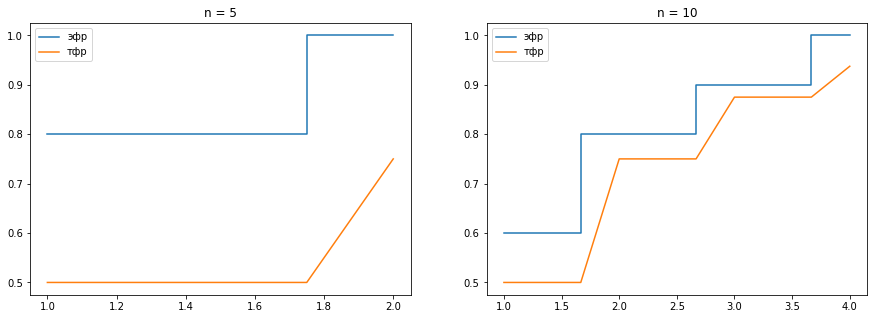

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].step(x5, yemp5, label='эфр')
axes[0].plot(x5, yteor5, label='тфр')
axes[0].legend()
axes[0].set(title='n = 5')

axes[1].step(x10, yemp10, label='эфр')
axes[1].plot(x10, yteor10, label='тфр')
axes[1].legend()
axes[1].set(title='n = 10')

In [7]:
ecdf100 = ECDF(sample100[0])
ecdf1000 = ECDF(sample1000[0])
ecdf100000 = ECDF(sample100000[0])
x100 = np.linspace(min(sample100[0]), max(sample100[0]), num=len(sample100[0]))
x1000 = np.linspace(min(sample1000[0]), max(sample1000[0]), num=len(sample1000[0]))
x100000 = np.linspace(min(sample100000[0]), max(sample100000[0]), num=len(sample100000[0]))
yemp100 = ecdf100(x100)
yemp1000 = ecdf1000(x1000)
yemp100000 = ecdf100000(x100000)
yteor100 = geom.cdf(x100,  p)
yteor1000 = geom.cdf(x1000,  p)
yteor100000 = geom.cdf(x100000,  p)

[Text(0.5, 1.0, 'n = 100000')]

D:\programs\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
D:\programs\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


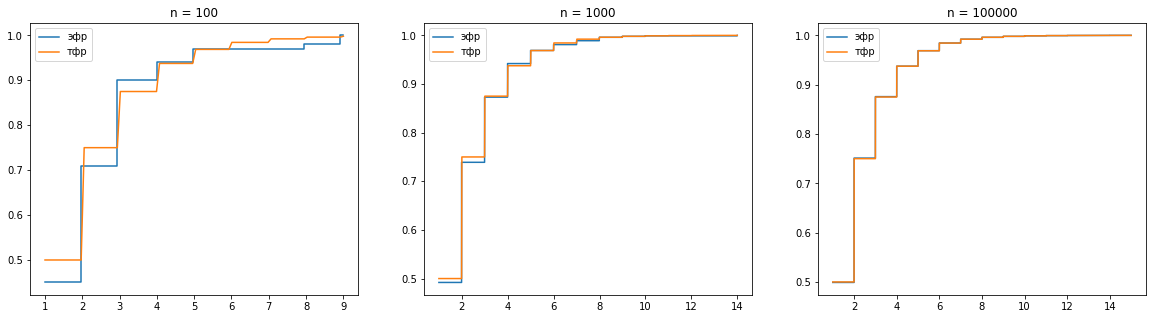

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].step(x100, yemp100, label='эфр')
axes[0].plot(x100, yteor100, label='тфр')
axes[0].legend()
axes[0].set(title='n = 100')

axes[1].step(x1000, yemp1000, label='эфр')
axes[1].plot(x1000, yteor1000, label='тфр')
axes[1].legend()
axes[1].set(title='n = 1000')

axes[2].step(x100000, yemp100000, label='эфр')
axes[2].plot(x100000, yteor100000, label='тфр')
axes[2].legend()
axes[2].set(title='n = 100000')

### Найдем точные верхние границы для всех пар э. ф. р.

#### p.s.: считаем для случайно сгенерированных выборок

In [9]:
import scipy.stats as sts

def diff(lala, land):
    geom_rv = sts.geom(p)
    a=geom_rv.rvs(lala)
    sorted=np.sort(a)
    x2 = []
    y2 = []
    y = 0
    var=dict()
    k=0
    for x in sorted:
        if x in var.keys():
            var[x]+=1
        else:
            var[x]=1
    for key,val in var.items():
        k+=(1*val)/len(a)
        x2.append(key)
        y2.append(k)
    geom_rv1 = sts.geom(p)
    a1=geom_rv1.rvs(land)
    sorted1=np.sort(a1)
    x3=  []
    y3= []
    y = 0
    var1=dict()
    k=0
    for x in sorted1:
        if x in var1.keys():
            var1[x]+=1
        else:
            var1[x]=1
    for key,val in var1.items():
        k+=(1*val)/len(a1)
        x3.append(key)
        y3.append(k)
    b=zip(x2,y2)
    n=zip(x3,y3)
    q=dict()
    ans=[]
    for i in b:
        q[i[0]]=i[1]
    for i in n:
        if i[0] in q.keys():
            ans.append(abs(q[i[0]]-i[1]))
    return np.round(max(ans), 2)

In [10]:
list1 = [5, 10, 100, 1000, 100000]
list2 = [5, 10, 100, 1000, 100000]
for i in list1:
    for j in list2:
        print('Точная верхняя граница для n={} и n={}: {}'.format(i, j, diff(i, j)))

Точная верхняя граница для n=5 и n=5: 0.4
Точная верхняя граница для n=5 и n=10: 0.1
Точная верхняя граница для n=5 и n=100: 0.24
Точная верхняя граница для n=5 и n=1000: 0.3
Точная верхняя граница для n=5 и n=100000: 0.15
Точная верхняя граница для n=10 и n=5: 0.2
Точная верхняя граница для n=10 и n=10: 0.0
Точная верхняя граница для n=10 и n=100: 0.15
Точная верхняя граница для n=10 и n=1000: 0.15
Точная верхняя граница для n=10 и n=100000: 0.1
Точная верхняя граница для n=100 и n=5: 0.08
Точная верхняя граница для n=100 и n=10: 0.3
Точная верхняя граница для n=100 и n=100: 0.12
Точная верхняя граница для n=100 и n=1000: 0.02
Точная верхняя граница для n=100 и n=100000: 0.1
Точная верхняя граница для n=1000 и n=5: 0.11
Точная верхняя граница для n=1000 и n=10: 0.22
Точная верхняя граница для n=1000 и n=100: 0.04
Точная верхняя граница для n=1000 и n=1000: 0.01
Точная верхняя граница для n=1000 и n=100000: 0.01
Точная верхняя граница для n=100000 и n=5: 0.3
Точная верхняя граница для 

### Построим вариационные ряды

In [11]:
varsample5, varsample10, varsample100, varsample1000, varsample100000 = [], [], [], [], []
for i in range(5):
    varsample5.append(sorted(sample5[i]))
    varsample10.append(sorted(sample10[i]))
    varsample100.append(sorted(sample100[i]))
    varsample1000.append(sorted(sample1000[i]))
    varsample100000.append(sorted(sample100000[i]))

In [12]:
print('Вариационный ряд выборки для n = 5:')
for x in varsample5: print(x)
print('Вариационный ряд выборки для n = 10:')
for x in varsample10: print(x)

Вариационный ряд выборки для n = 5:
[1, 1, 1, 1, 2]
[1, 2, 2, 3, 4]
[1, 1, 1, 2, 2]
[1, 1, 2, 2, 6]
[1, 1, 2, 2, 2]
Вариационный ряд выборки для n = 10:
[1, 1, 1, 1, 1, 1, 2, 2, 3, 4]
[1, 1, 1, 1, 1, 1, 1, 1, 3, 3]
[1, 1, 1, 1, 1, 1, 1, 1, 2, 3]
[1, 1, 1, 1, 1, 1, 1, 2, 2, 3]
[1, 1, 1, 1, 2, 2, 2, 2, 2, 3]


### Посчитаем квантили

In [13]:
#выборочная квантиль
alpha = [0.1, 0.5, 0.7]
vybquantiles = []
for i in range(3):
    curquant = []
    curquant.append(varsample5[0][round(5*alpha[i]+1)])
    curquant.append(varsample10[0][round(10*alpha[i]+1)])
    curquant.append(varsample100[0][round(100*alpha[i]+1)])
    curquant.append(varsample1000[0][round(1000*alpha[i]+1)])
    curquant.append(varsample100000[0][round(100000*alpha[i]+1)])
    vybquantiles.append(curquant)

In [14]:
#теоретические квантили
quantiles = []
for i in range(3):
    curquant = []
    k = round(alpha[i]*(5-1))
    if k == 5 - 1:
        dob = varsample5[0][k]
    else:
        dob = varsample5[0][k+1]
    if k + 1 < alpha[i]*5:
        curquant.append(dob)
    elif k + 1 == alpha[i]*5:
        curquant.append(0.5*(dob + varsample5[0][k]))
    else:
        curquant.append(varsample5[0][k])
        
    k = round(alpha[i]*(10-1))
    if k == 10 - 1:
        dob = varsample10[0][k]
    else:
        dob = varsample10[0][k+1]
    if k + 1 < alpha[i]*10:
        curquant.append(dob)
    elif k + 1 == alpha[i]*10:
        curquant.append(0.5*(dob + varsample10[0][k]))
    else:
        curquant.append(varsample10[0][k])
        
    k = round(alpha[i]*(100-1))
    if k == 100 - 1:
        dob = varsample100[0][k]
    else:
        dob = varsample100[0][k+1]
    if k + 1 < alpha[i]*100:
        curquant.append(dob)
    elif k + 1 == alpha[i]*100:
        curquant.append(0.5*(dob + varsample100[0][k]))
    else:
        curquant.append(varsample100[0][k])
        
    k = round(alpha[i]*(1000-1))
    if k == 1000 - 1:
        dob = varsample1000[0][k]
    else:
        dob = varsample1000[0][k+1]
    if k + 1 < alpha[i]*1000:
        curquant.append(dob)
    elif k + 1 == alpha[i]*1000:
        curquant.append(0.5*(dob + varsample1000[0][k]))
    else:
        curquant.append(varsample1000[0][k])
    
    k = round(alpha[i]*(100000-1))
    if k == 100000 - 1:
        dob = varsample100000[0][k]
    else:
        dob = varsample100000[0][k+1]
    if k + 1 < alpha[i]*100000:
        curquant.append(dob)
    elif k + 1 == alpha[i]*100000:
        curquant.append(0.5*(dob + varsample100000[0][k]))
    else:
        curquant.append(varsample100000[0][k])
    
    quantiles.append(curquant)

In [15]:
import pandas as pd
dfvyb = pd.DataFrame([vybquantiles[0], vybquantiles[1], vybquantiles[2]], index=alpha, columns =list1 )
dfteor = pd.DataFrame(quantiles, index=alpha, columns =list1 )
print('Выборочные квантили:')
print(dfvyb)
print('Теоретические квантили:')
print(dfteor)

Выборочные квантили:
     5       10      100     1000    100000
0.1       1       1       1       1       1
0.5       2       2       2       2       2
0.7       2       3       3       2       2
Теоретические квантили:
     5       10      100     1000    100000
0.1       1     1.0     1.0     1.0     1.0
0.5       1     1.0     2.0     2.0     2.0
0.7       1     2.0     2.0     2.0     2.0


### Строим гистограммы и полигоны частот 

[Text(0.5, 1.0, 'n = 5')]

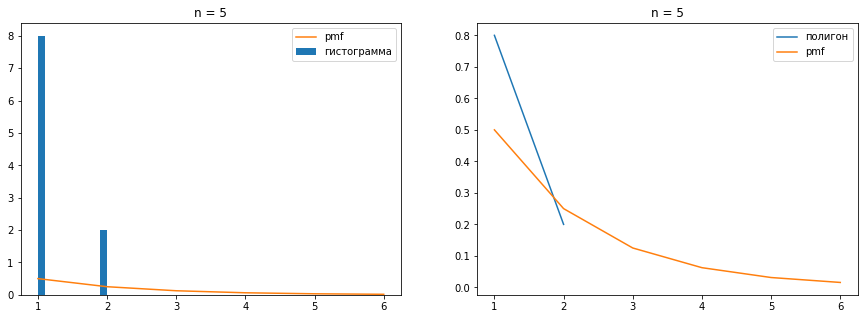

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample5[0])
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[0].legend()
axes[0].set(title='n = 5')
s = np.unique(sample5[0], return_counts=True)
y = []
for i in s[1]:
    y.append(i / len(sample5[0]))
axes[1].plot(s[0], y, label='полигон')
axes[1].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[1].legend()
axes[1].set(title='n = 5')

[Text(0.5, 1.0, 'n = 10')]

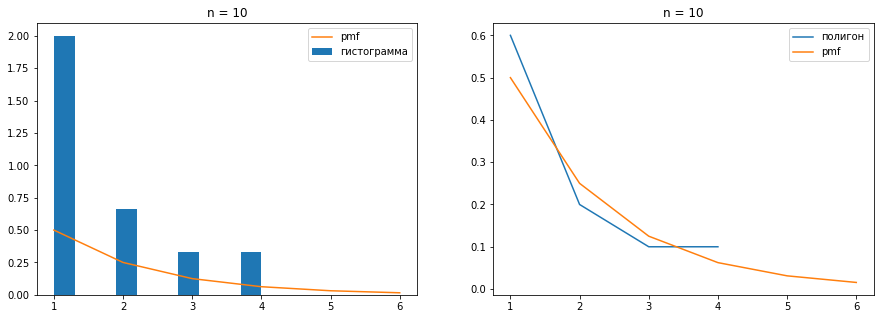

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample10[0])
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[0].legend()
axes[0].set(title='n = 10')
s = np.unique(sample10[0], return_counts=True)
y = []
for i in s[1]:
    y.append(i / len(sample10[0]))
axes[1].plot(s[0], y, label='полигон')
axes[1].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[1].legend()
axes[1].set(title='n = 10')

[Text(0.5, 1.0, 'n = 100')]

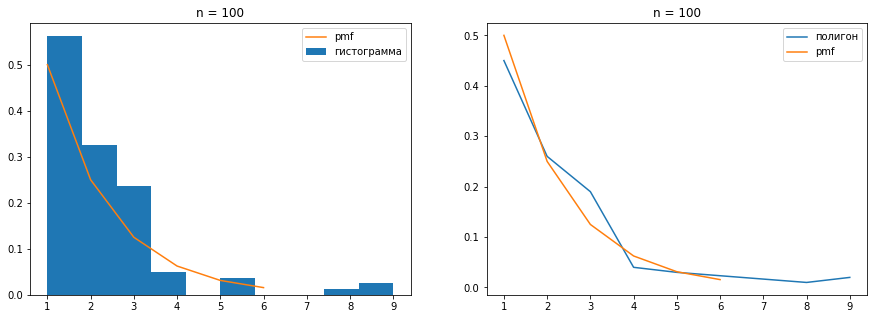

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample100[0])
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[0].legend()
axes[0].set(title='n = 100')
s = np.unique(sample100[0], return_counts=True)
y = []
for i in s[1]:
    y.append(i / len(sample100[0]))
axes[1].plot(s[0], y, label='полигон')
axes[1].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[1].legend()
axes[1].set(title='n = 100')

[Text(0.5, 1.0, 'n = 1000')]

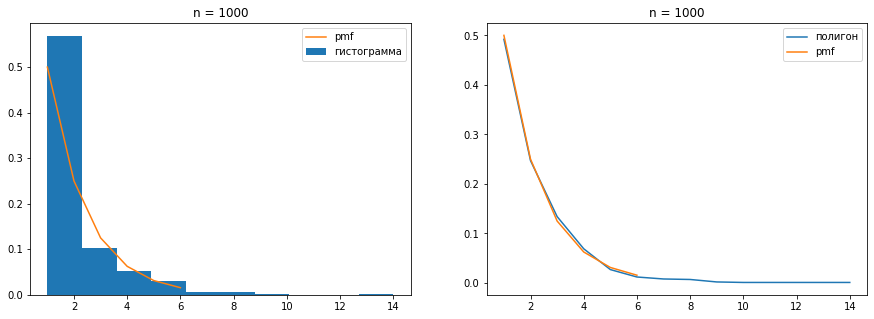

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample1000[0])
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[0].legend()
axes[0].set(title='n = 1000')
s = np.unique(sample1000[0], return_counts=True)
y = []
for i in s[1]:
    y.append(i / len(sample1000[0]))
axes[1].plot(s[0], y, label='полигон')
axes[1].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[1].legend()
axes[1].set(title='n = 1000')

[Text(0.5, 1.0, 'n = 100000')]

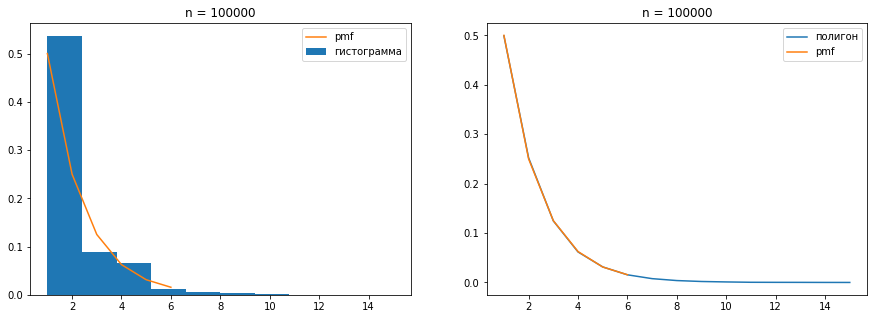

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample100000[0])
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[0].legend()
axes[0].set(title='n = 100000')
s = np.unique(sample100000[0], return_counts=True)
y = []
for i in s[1]:
    y.append(i / len(sample100000[0]))
axes[1].plot(s[0], y, label='полигон')
axes[1].plot(x, geom.pmf(x, p), ms=8, label='pmf')
axes[1].legend()
axes[1].set(title='n = 100000')

## Распределение Лапласа

### Построим 5 реализаций выборок для различных n

In [21]:
lam = 1
mu = 3
sample_5, sample_10, sample_100, sample_1000, sample_100000 = [], [], [], [], []
for i in range(5):
    sample_5.append(laplace.rvs(loc=mu, scale=lam, size=5))
    sample_10.append(laplace.rvs(loc=mu, scale=lam, size=10))
    sample_100.append(laplace.rvs(loc=mu, scale=lam, size=100))
    sample_1000.append(laplace.rvs(loc=mu, scale=lam, size=1000))
    sample_100000.append(laplace.rvs(loc=mu, scale=lam, size=100000))

In [22]:
print('Выборки для n = 5:')
for x in sample_5: print(np.around(x, 3))
print('Выборки для n = 10:')
for x in sample_10: print(np.around(x, 3))

Выборки для n = 5:
[2.813 2.391 2.312 5.065 2.487]
[-1.946  2.768  5.379  4.114  2.752]
[-0.123  1.81   3.996  2.547  3.026]
[5.587 2.972 2.677 2.82  4.202]
[1.704 3.959 3.568 5.01  1.217]
Выборки для n = 10:
[ 3.041  3.713  3.355 -0.885  0.459  2.946  3.273  1.995  3.685  4.167]
[-0.542  3.935  3.327  5.675  2.959  4.837  2.811  3.737  0.97   1.08 ]
[2.786 6.668 2.597 2.212 3.184 1.372 4.316 2.804 3.821 2.281]
[ 3.218  2.798  3.691  6.012  3.485  2.528  1.144 -1.032  4.32   1.296]
[3.061 3.341 1.466 2.476 1.973 2.275 3.349 2.537 3.306 3.416]


### Построим эмпирическую функцию распределения

In [58]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_5 = ECDF(sample_5[0])
ecdf_5 = ecdf_5(sample_5[0])
ecdf_10 = ECDF(sample_10[0])
ecdf_10 = ecdf_10(sample_10[0])
ecdf_100 = ECDF(sample_100[0])
ecdf_1000 = ECDF(sample_1000[0])
ecdf_100000 = ECDF(sample_100000[0])
print('Эмпирическая функция распределения для n = 5:')
print(ecdf_5)
print('Эмпирическая функция распределения для n = 10:')
print(ecdf_10)

Эмпирическая функция распределения для n = 5:
[0.8 0.4 0.2 1.  0.6]
Эмпирическая функция распределения для n = 10:
[0.5 0.9 0.7 0.1 0.2 0.4 0.6 0.3 0.8 1. ]


In [84]:
sam = [sample_5[0], sample_10[0], sample_100[0], sample_1000[0], sample_100000[0]]
ecdfs = []
for i in range(5):
    e = ECDF(sam[i])
    ecdfs.append(e(sam[i]))

In [100]:
list1 = [5, 10, 100, 1000, 100000]
list2 = [5, 10, 100, 1000, 100000]
k1 = -1
f = 1
for i in list1:
    k1 += 1
    k2 = -1
    for j in list2:
        f += 1
        k2 += 1
        m = 0.0
        length = min(i, j)
        s1 = ecdfs[k1]
        s2 = ecdfs[k2]
        for h in range(length):
            if m < abs(s1[h] - s2[h]):
                m = abs(s1[h] - s2[h])
        print('Точная верхняя граница для n={} и n={}: {}'.format(i, j, np.around(m / f, 2)))
    f = f - 5 + k1

Точная верхняя граница для n=5 и n=5: 0.0
Точная верхняя граница для n=5 и n=10: 0.3
Точная верхняя граница для n=5 и n=100: 0.19
Точная верхняя граница для n=5 и n=1000: 0.2
Точная верхняя граница для n=5 и n=100000: 0.08
Точная верхняя граница для n=10 и n=5: 0.45
Точная верхняя граница для n=10 и n=10: 0.0
Точная верхняя граница для n=10 и n=100: 0.18
Точная верхняя граница для n=10 и n=1000: 0.16
Точная верхняя граница для n=10 и n=100000: 0.13
Точная верхняя граница для n=100 и n=5: 0.25
Точная верхняя граница для n=100 и n=10: 0.18
Точная верхняя граница для n=100 и n=100: 0.0
Точная верхняя граница для n=100 и n=1000: 0.16
Точная верхняя граница для n=100 и n=100000: 0.14
Точная верхняя граница для n=1000 и n=5: 0.2
Точная верхняя граница для n=1000 и n=10: 0.13
Точная верхняя граница для n=1000 и n=100: 0.13
Точная верхняя граница для n=1000 и n=1000: 0.0
Точная верхняя граница для n=1000 и n=100000: 0.11
Точная верхняя граница для n=100000 и n=5: 0.06
Точная верхняя граница дл

### Построим графики

In [24]:
ecdf_5 = ECDF(sample_5[0])
ecdf_10 = ECDF(sample_10[0])
x_5 = np.linspace(min(sample_5[0]), max(sample_5[0]), num=len(sample_5[0]))
x_10 = np.linspace(min(sample_10[0]), max(sample_10[0]), num=len(sample_10[0]))
yemp_5 = ecdf_5(x_5)
yemp_10 = ecdf_10(x_10)
yteor_5 = laplace.cdf(x_5, loc=mu, scale=lam)
yteor_10 = laplace.cdf(x_10, loc=mu, scale=lam)

[Text(0.5, 1.0, 'n = 10')]

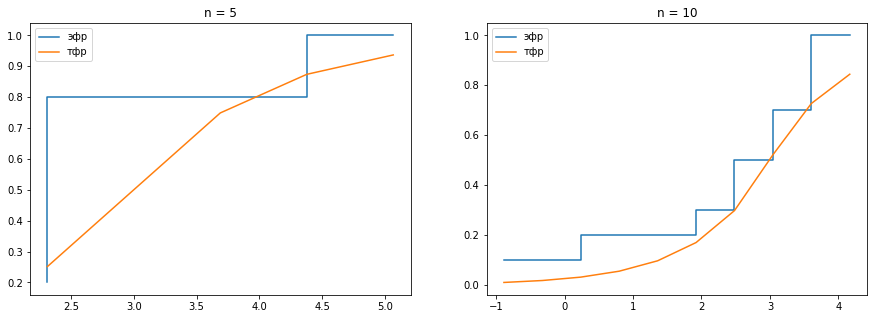

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].step(x_5, yemp_5, label='эфр')
axes[0].plot(x_5, yteor_5, label='тфр')
axes[0].legend()
axes[0].set(title='n = 5')

axes[1].step(x_10, yemp_10, label='эфр')
axes[1].plot(x_10, yteor_10, label='тфр')
axes[1].legend()
axes[1].set(title='n = 10')

In [26]:
ecdf_100 = ECDF(sample_100[0])
ecdf_1000 = ECDF(sample_1000[0])
ecdf_100000 = ECDF(sample_100000[0])
x_100 = np.linspace(min(sample_100[0]), max(sample_100[0]), num=len(sample_100[0]))
x_1000 = np.linspace(min(sample_1000[0]), max(sample_1000[0]), num=len(sample_1000[0]))
x_100000 = np.linspace(min(sample_100000[0]), max(sample_100000[0]), num=len(sample_100000[0]))
yemp_100 = ecdf_100(x_100)
yemp_1000 = ecdf_1000(x_1000)
yemp_100000 = ecdf_100000(x_100000)
yteor_100 = laplace.cdf(x_100,  loc=mu, scale=lam)
yteor_1000 = laplace.cdf(x_1000,  loc=mu, scale=lam)
yteor_100000 = laplace.cdf(x_100000,  loc=mu, scale=lam)

[Text(0.5, 1.0, 'n = 100000')]

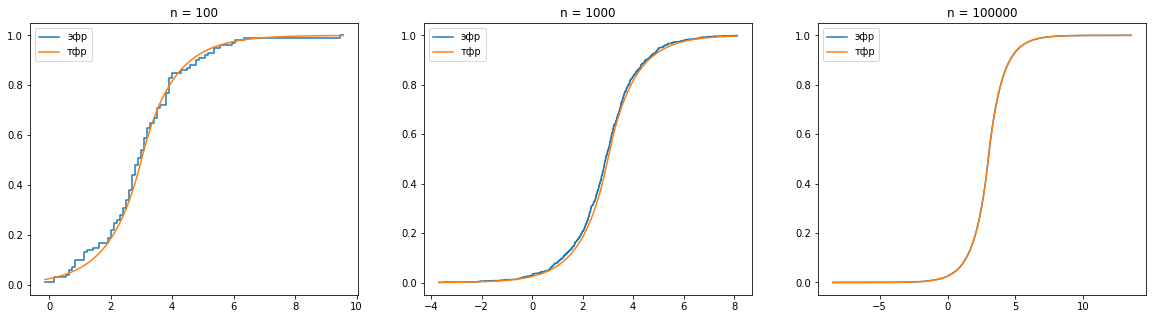

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].step(x_100, yemp_100, label='эфр')
axes[0].plot(x_100, yteor_100, label='тфр')
axes[0].legend()
axes[0].set(title='n = 100')

axes[1].step(x_1000, yemp_1000, label='эфр')
axes[1].plot(x_1000, yteor_1000, label='тфр')
axes[1].legend()
axes[1].set(title='n = 1000')

axes[2].step(x_100000, yemp_100000, label='эфр')
axes[2].plot(x_100000, yteor_100000, label='тфр')
axes[2].legend()
axes[2].set(title='n = 100000')

### Построим вариационные ряды 

In [28]:
varsample_5, varsample_10, varsample_100, varsample_1000, varsample_100000 = [], [], [], [], []
for i in range(5):
    varsample_5.append(sorted(sample_5[i]))
    varsample_10.append(sorted(sample_10[i]))
    varsample_100.append(sorted(sample_100[i]))
    varsample_1000.append(sorted(sample_1000[i]))
    varsample_100000.append(sorted(sample_100000[i]))

In [29]:
print('Вариационный ряд выборки для n = 5:')
for x in varsample_5: print(np.around(x, 3))
print('Вариационный ряд выборки для n = 10:')
for x in varsample_10: print(np.around(x, 3))

Вариационный ряд выборки для n = 5:
[2.312 2.391 2.487 2.813 5.065]
[-1.946  2.752  2.768  4.114  5.379]
[-0.123  1.81   2.547  3.026  3.996]
[2.677 2.82  2.972 4.202 5.587]
[1.217 1.704 3.568 3.959 5.01 ]
Вариационный ряд выборки для n = 10:
[-0.885  0.459  1.995  2.946  3.041  3.273  3.355  3.685  3.713  4.167]
[-0.542  0.97   1.08   2.811  2.959  3.327  3.737  3.935  4.837  5.675]
[1.372 2.212 2.281 2.597 2.786 2.804 3.184 3.821 4.316 6.668]
[-1.032  1.144  1.296  2.528  2.798  3.218  3.485  3.691  4.32   6.012]
[1.466 1.973 2.275 2.476 2.537 3.061 3.306 3.341 3.349 3.416]


### Посчитаем квантили

In [30]:
#выборочная квантиль
alpha = [0.1, 0.5, 0.7]
vybquantiles = []
for i in range(3):
    curquant = []
    curquant.append(varsample_5[0][round(5*alpha[i]+1)])
    curquant.append(varsample_10[0][round(10*alpha[i]+1)])
    curquant.append(varsample_100[0][round(100*alpha[i]+1)])
    curquant.append(varsample_1000[0][round(1000*alpha[i]+1)])
    curquant.append(varsample_100000[0][round(100000*alpha[i]+1)])
    vybquantiles.append(curquant)

In [31]:
#теоретические квантили
quantiles = []
for i in range(3):
    curquant = []
    k = round(alpha[i]*(5-1))
    if k == 5 - 1:
        dob = varsample_5[0][k]
    else:
        dob = varsample_5[0][k+1]
    if k + 1 < alpha[i]*5:
        curquant.append(dob)
    elif k + 1 == alpha[i]*5:
        curquant.append(0.5*(dob + varsample_5[0][k]))
    else:
        curquant.append(varsample_5[0][k])
        
    k = round(alpha[i]*(10-1))
    if k == 10 - 1:
        dob = varsample_10[0][k]
    else:
        dob = varsample_10[0][k+1]
    if k + 1 < alpha[i]*10:
        curquant.append(dob)
    elif k + 1 == alpha[i]*10:
        curquant.append(0.5*(dob + varsample_10[0][k]))
    else:
        curquant.append(varsample_10[0][k])
        
    k = round(alpha[i]*(100-1))
    if k == 100 - 1:
        dob = varsample_100[0][k]
    else:
        dob = varsample_100[0][k+1]
    if k + 1 < alpha[i]*100:
        curquant.append(dob)
    elif k + 1 == alpha[i]*100:
        curquant.append(0.5*(dob + varsample_100[0][k]))
    else:
        curquant.append(varsample_100[0][k])
        
    k = round(alpha[i]*(1000-1))
    if k == 1000 - 1:
        dob = varsample_1000[0][k]
    else:
        dob = varsample_1000[0][k+1]
    if k + 1 < alpha[i]*1000:
        curquant.append(dob)
    elif k + 1 == alpha[i]*1000:
        curquant.append(0.5*(dob + varsample_1000[0][k]))
    else:
        curquant.append(varsample_1000[0][k])
    
    k = round(alpha[i]*(100000-1))
    if k == 100000 - 1:
        dob = varsample_100000[0][k]
    else:
        dob = varsample_100000[0][k+1]
    if k + 1 < alpha[i]*100000:
        curquant.append(dob)
    elif k + 1 == alpha[i]*100000:
        curquant.append(0.5*(dob + varsample_100000[0][k]))
    else:
        curquant.append(varsample_100000[0][k])
    
    quantiles.append(curquant)

In [32]:
import pandas as pd
dfvyb = pd.DataFrame(np.around(vybquantiles, 3), index=alpha, columns =list1 )
dfteor = pd.DataFrame(np.around(quantiles, 3), index=alpha, columns =list1 )
print('Выборочные квантили:')
print(dfvyb)
print('Теоретические квантили:')
print(dfteor)

Выборочные квантили:
     5       10      100     1000    100000
0.1   2.487   1.995   1.202   1.229   1.375
0.5   5.065   3.355   3.014   2.922   2.999
0.7   5.065   3.713   3.682   3.483   3.509
Теоретические квантили:
     5       10      100     1000    100000
0.1   2.312   0.459   1.199   1.228   1.375
0.5   2.487   3.157   2.996   2.921   2.999
0.7   2.813   3.520   3.581   3.476   3.509


### Строим гистограммы и полигоны частот 

[Text(0.5, 1.0, 'n = 5')]

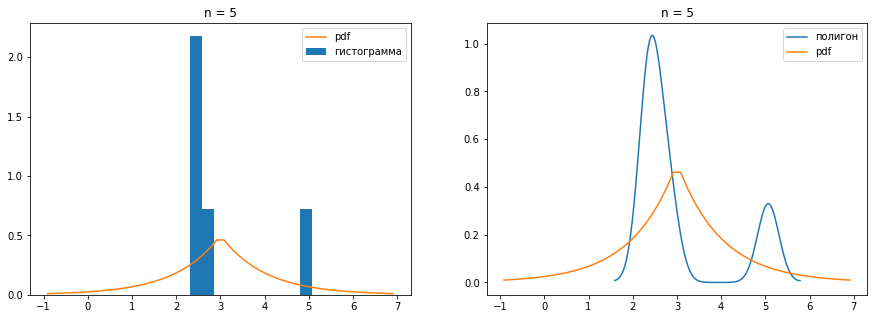

In [33]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample_5[0])
x = np.linspace(laplace.ppf(0.01, loc=mu, scale=lam), laplace.ppf(0.99, loc=mu, scale=lam))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[0].legend()
axes[0].set(title='n = 5')
axes[1] = sns.kdeplot(sample_5[0], label='полигон')
axes[1].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[1].legend()
axes[1].set(title='n = 5')

[Text(0.5, 1.0, 'n = 10')]

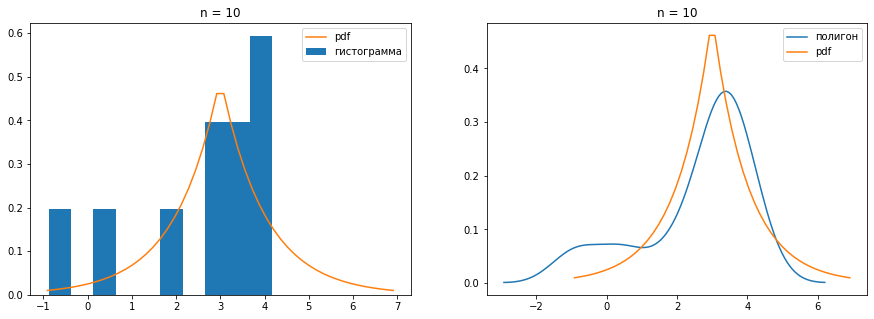

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample_10[0])
x = np.linspace(laplace.ppf(0.01, loc=mu, scale=lam), laplace.ppf(0.99, loc=mu, scale=lam))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[0].legend()
axes[0].set(title='n = 10')
axes[1] = sns.kdeplot(sample_10[0], label='полигон')
axes[1].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[1].legend()
axes[1].set(title='n = 10')

[Text(0.5, 1.0, 'n = 100')]

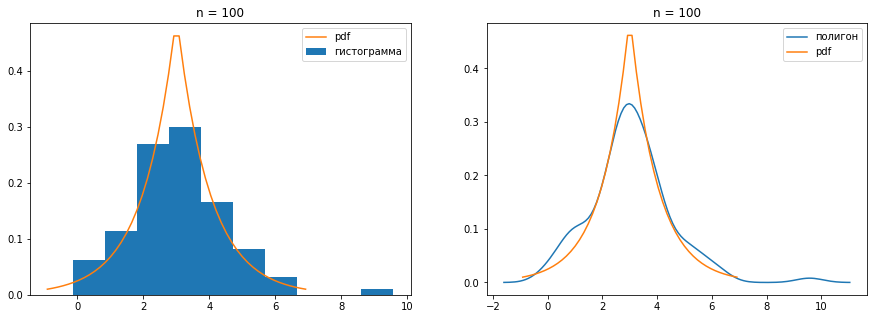

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample_100[0])
x = np.linspace(laplace.ppf(0.01, loc=mu, scale=lam), laplace.ppf(0.99, loc=mu, scale=lam))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[0].legend()
axes[0].set(title='n = 100')

axes[1] = sns.kdeplot(sample_100[0], label='полигон')
axes[1].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[1].legend()
axes[1].set(title='n = 100')

[Text(0.5, 1.0, 'n = 1000')]

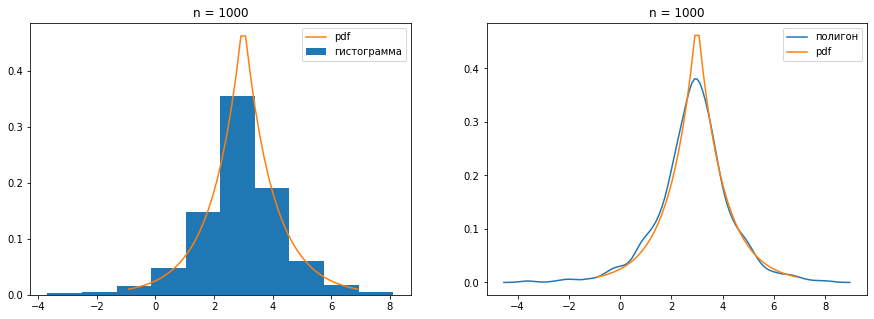

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample_1000[0])
x = np.linspace(laplace.ppf(0.01, loc=mu, scale=lam), laplace.ppf(0.99, loc=mu, scale=lam))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[0].legend()
axes[0].set(title='n = 1000')

axes[1] = sns.kdeplot(sample_1000[0], label='полигон')
axes[1].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[1].legend()
axes[1].set(title='n = 1000')

[Text(0.5, 1.0, 'n = 100000')]

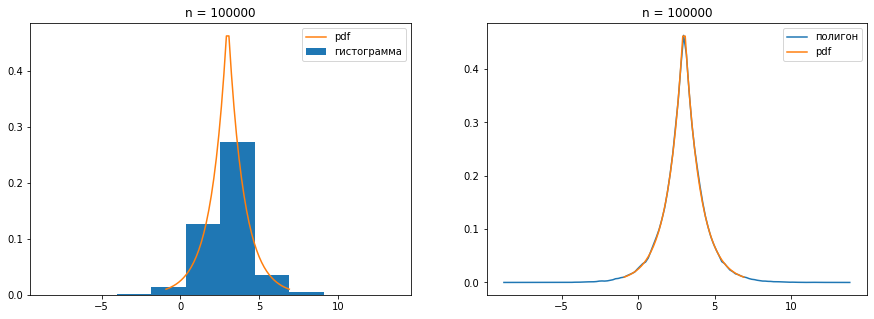

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
s = list(varsample_100000[0])
x = np.linspace(laplace.ppf(0.01, loc=mu, scale=lam), laplace.ppf(0.99, loc=mu, scale=lam))
axes[0].hist(s, density = True, label='гистограмма')
axes[0].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[0].legend()
axes[0].set(title='n = 100000')

axes[1] = sns.kdeplot(sample_100000[0], label='полигон')
axes[1].plot(x, laplace.pdf(x, loc=mu, scale=lam), ms=8, label='pdf')
axes[1].legend()
axes[1].set(title='n = 100000')

# Оценки 

## Геометрическое распределение 

In [48]:
sample = [[], [], [], [], []]
sample[0] = sample5
sample[1] = sample10
sample[2] = sample100
sample[3] = sample1000
sample[4] = sample100000

### Считаем выборочное среднее 

In [49]:
x_mid = []
for i in range(5):
    cur = []
    for j in range(5):
        cur.append(np.mean(sample[i][j]))
    x_mid.append(cur)
print('Выборочное среднее:')
for i in x_mid: print(i)

Выборочное среднее:
[1.2, 2.4, 1.4, 2.4, 1.6]
[1.7, 1.4, 1.3, 1.4, 1.7]
[2.11, 1.83, 1.91, 2.21, 2.11]
[2.025, 2.059, 1.952, 1.988, 2.045]
[1.99894, 1.99845, 1.99862, 1.99847, 1.99846]


### Считаем выборочную дисперсию 

In [50]:
x_dis = []
for i in range(5):
    cur = []
    for j in range(5):
        cur.append(np.mean((sample[i][j]-x_mid[i][j])**2))
    x_dis.append(cur)
print('Выборочная дисперсия:')
for i in np.around(x_dis, 3): print(i)

Выборочная дисперсия:
[0.16 1.04 0.24 3.44 0.24]
[1.01 0.64 0.41 0.44 0.41]
[2.398 1.441 1.582 2.766 2.358]
[2.094 1.972 1.88  1.894 2.307]
[1.995 2.01  1.988 2.001 1.982]


## Распределение Лапласа

In [51]:
sample_ = [[], [], [], [], []]
sample_[0] = sample_5
sample_[1] = sample_10
sample_[2] = sample_100
sample_[3] = sample_1000
sample_[4] = sample_100000

### Считаем выборочное среднее 

In [54]:
y_mid = []
for i in range(5):
    cur = []
    for j in range(5):
        cur.append(np.mean(sample_[i][j]))
    y_mid.append(cur)
print('Выборочное среднее:')
for i in np.around(y_mid, 3): print(i)

Выборочное среднее:
[3.014 2.613 2.251 3.652 3.092]
[2.575 2.879 3.204 2.746 2.72 ]
[3.05  2.933 3.023 3.102 3.162]
[2.889 3.033 3.037 2.985 3.04 ]
[2.994 2.997 2.997 2.999 2.991]


### Считаем выборочную дисперсию 

In [55]:
y_dis = []
for i in range(5):
    cur = []
    for j in range(5):
        cur.append(np.mean((sample_[i][j]-y_mid[i][j])**2))
    y_dis.append(cur)
print('Выборочная дисперсия:')
for i in np.around(y_dis, 3): print(i)

Выборочная дисперсия:
[1.081 6.146 1.912 1.23  2.019]
[2.329 3.23  1.951 3.38  0.415]
[2.173 1.751 1.895 1.781 2.482]
[1.979 1.956 1.742 1.902 1.868]
[2.009 1.996 2.002 1.972 2.003]
